In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tweepy
import json
import numpy as np
import pandas as pd
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
target_cnn="@CNN"
target_bbc="@BBCWorld"
target_nyt="@NYT"
target_cbs="@CBSNews"
target_fox="@FoxNews"

In [6]:
#CNN
#compound list
cnn_compound_list = []
cnn_positive_list = []
cnn_negative_list = []
cnn_neutral_list = []
cnn_date_time=[]

#counter
cnn_counter=0

#grab 100 tweets
cnn_tweets = api.user_timeline(target_cnn, count=100, result_type="recent")

#analyze sentiment of 100 tweets
for tweet in cnn_tweets:
    compound = analyzer.polarity_scores(tweet["text"])["compound"]
    pos = analyzer.polarity_scores(tweet["text"])["pos"]
    neu = analyzer.polarity_scores(tweet["text"])["neu"]
    neg = analyzer.polarity_scores(tweet["text"])["neg"]
    
    #append compound list
    cnn_compound_list.append(compound)
    cnn_positive_list.append(pos)
    cnn_negative_list.append(neg)
    cnn_neutral_list.append(neu)
    
    #add to counter
    cnn_counter+=1

#make dict
cnn_sentiment=({"Compound": cnn_compound_list,
                "Positive": cnn_positive_list,
                "Negative": cnn_negative_list,
                "Neutral": cnn_neutral_list,
                "Tweets Ago": cnn_counter})

#check results w/ dataframe 
cnn_sentiment_pd = pd.DataFrame.from_dict(cnn_sentiment)
cnn_sentiment_pd.head(10)

,Compound,Positive,Negative,Neutral,Tweets Ago
0,0.2732,0.104,0.000,0.896,100
1,0.4939,0.158,0.000,0.842,100
2,-0.7579,0.000,0.302,0.698,100
3,0.0000,0.000,0.000,1.000,100
4,0.0000,0.000,0.000,1.000,100
5,0.0000,0.000,0.000,1.000,100
6,-0.4019,0.151,0.180,0.669,100
7,0.2732,0.148,0.077,0.774,100
8,-0.6249,0.000,0.212,0.788,100
9,0.2023,0.083,0.000,0.917,100


In [89]:
#BBC
#compound list
bbc_compound_list = []
bbc_positive_list = []
bbc_negative_list = []
bbc_neutral_list = []

#counter
bbc_counter=0

#grab 100 tweets
bbc_tweets = api.search(target_bbc, count=100, result_type="recent")

#analyze sentiment of 100 tweets
for tweet in bbc_tweets["statuses"]:
    compound = analyzer.polarity_scores(tweet["text"])["compound"]
    pos = analyzer.polarity_scores(tweet["text"])["pos"]
    neu = analyzer.polarity_scores(tweet["text"])["neu"]
    neg = analyzer.polarity_scores(tweet["text"])["neg"]
    
    #append compound list
    bbc_compound_list.append(compound)
    bbc_positive_list.append(pos)
    bbc_negative_list.append(neg)
    bbc_neutral_list.append(neu)
    
    #add to counter
    bbc_counter+=1

#make dict
bbc_sentiment=({"Compound": bbc_compound_list,
                "Positive": bbc_positive_list,
                "Negative": bbc_negative_list,
                "Neutral": bbc_neutral_list,
                "Tweets Ago": bbc_counter})

#check results w/ dataframe 
bbc_sentiment_pd = pd.DataFrame.from_dict(bbc_sentiment)
bbc_sentiment_pd.head(10)

In [90]:
# #NYT
# #compound list
# nyt_compound_list = []
# nyt_positive_list = []
# nyt_negative_list = []
# nyt_neutral_list = []

# #counter
# nyt_counter=0

# #grab 100 tweets
# nyt_tweets = api.search(target_nyt, count=100, result_type="recent")

# #analyze sentiment of 100 tweets
# for tweet in nyt_tweets["statuses"]:
#     compound = analyzer.polarity_scores(tweet["text"])["compound"]
#     pos = analyzer.polarity_scores(tweet["text"])["pos"]
#     neu = analyzer.polarity_scores(tweet["text"])["neu"]
#     neg = analyzer.polarity_scores(tweet["text"])["neg"]
    
#     #append compound list
#     nyt_compound_list.append(compound)
#     nyt_positive_list.append(pos)
#     nyt_negative_list.append(neg)
#     nyt_neutral_list.append(neu)
    
#     #add to counter
#     nyt_counter+=1

# #make dict
# nyt_sentiment=({"Compound": nyt_compound_list,
#                 "Positive": nyt_positive_list,
#                 "Negative": nyt_negative_list,
#                 "Neutral": nyt_neutral_list,
#                 "Tweets Ago": nyt_counter})

# #check results w/ dataframe 
# nyt_sentiment_pd = pd.DataFrame.from_dict(nyt_sentiment)
# nyt_sentiment_pd.head(10)

In [91]:
# #CBS
# #compound list
# cbs_compound_list = []
# cbs_positive_list = []
# cbs_negative_list = []
# cbs_neutral_list = []

# #counter
# cbs_counter=0

# #grab 100 tweets
# cbs_tweets = api.search(target_cbs, count=100, result_type="recent")

# #analyze sentiment of 100 tweets
# for tweet in cbs_tweets["statuses"]:
#     compound = analyzer.polarity_scores(tweet["text"])["compound"]
#     pos = analyzer.polarity_scores(tweet["text"])["pos"]
#     neu = analyzer.polarity_scores(tweet["text"])["neu"]
#     neg = analyzer.polarity_scores(tweet["text"])["neg"]
    
#     #append compound list
#     cbs_compound_list.append(compound)
#     cbs_positive_list.append(pos)
#     cbs_negative_list.append(neg)
#     cbs_neutral_list.append(neu)
    
#     #add to counter
#     cbs_counter+=1

# #make dict
# cbs_sentiment=({"Compound": cbs_compound_list,
#                 "Positive": cbs_positive_list,
#                 "Negative": cbs_negative_list,
#                 "Neutral": cbs_neutral_list,
#                 "Tweets Ago": cbs_counter})

# #check results w/ dataframe 
# cbs_sentiment_pd = pd.DataFrame.from_dict(cbs_sentiment)
# cbs_sentiment_pd.head(10)


In [92]:
# #Fox
# #compound list
# fox_compound_list = []
# fox_positive_list = []
# fox_negative_list = []
# fox_neutral_list = []

# #counter
# fox_counter=0

# #grab 100 tweets
# fox_tweets = api.search(target_nyt, count=100, result_type="recent")

# #analyze sentiment of 100 tweets
# for tweet in fox_tweets["statuses"]:
#     compound = analyzer.polarity_scores(tweet["text"])["compound"]
#     pos = analyzer.polarity_scores(tweet["text"])["pos"]
#     neu = analyzer.polarity_scores(tweet["text"])["neu"]
#     neg = analyzer.polarity_scores(tweet["text"])["neg"]
    
#     #append compound list
#     fox_compound_list.append(compound)
#     fox_positive_list.append(pos)
#     fox_negative_list.append(neg)
#     fox_neutral_list.append(neu)
    
#     #add to counter
#     fox_counter+=1

# #make dict
# fox_sentiment=({"Compound": fox_compound_list,
#                 "Positive": fox_positive_list,
#                 "Negative": fox_negative_list,
#                 "Neutral": fox_neutral_list,
#                 "Tweets Ago": fox_counter})

# #check results w/ dataframe 
# fox_sentiment_pd = pd.DataFrame.from_dict(fox_sentiment)
# fox_sentiment_pd.head(10)

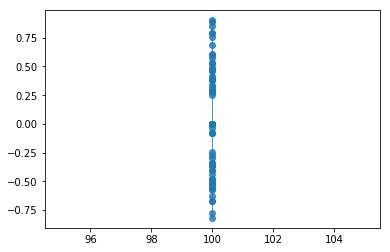

In [93]:
#Build scatter plot
x_vals = cnn_sentiment_pd["Tweets Ago"]
y_vals = cnn_sentiment_pd["Compound"]
plt.plot(x_vals,
         y_vals, marker="o", linewidth=0.5,
         alpha=0.8)
#cnn_scatter= plt.scatter(cnn_counter,cnn_compound_list,marker="o", facecolors="lightcoral", edgecolors="black",alpha=0.75)
plt.show()